### Process Valles Caldera flume data to specific discharge for Lower La Jara Creek below Vcm

Contributing area for lower La Jara Creek: 3,671,857 m2

Values are in CFS and are daily half hourly averages

In [18]:
data = pd.read_csv('./data/Daily_Valles_StreamFlow_wy2008_2010.csv')

In [19]:
data.iloc[0,:] = np.NaN

In [20]:
data.dropna(inplace=True)

In [21]:
data.index = pd.DatetimeIndex(data.LocalDateTime)

In [22]:
del data['LocalDateTime']

In [23]:
data = data.astype(np.float64)

In [24]:
data.loc[data.LowerLaJara==-9999,'LowerLaJara'] = np.NaN
data.loc[data.HistoryGrove==-9999,'HistoryGrove'] = np.NaN
data.loc[data.UpperJaramillo==-9999,'UpperJaramillo'] = np.NaN

In [25]:
data.tail()

,LowerLaJara,HistoryGrove,UpperJaramillo
2010-09-26,0.141,0.077,0.113
2010-09-27,0.168,0.074,0.124
2010-09-28,0.243,0.075,0.154
2010-09-29,0.260,0.077,0.172
2010-09-30,0.265,0.079,0.174


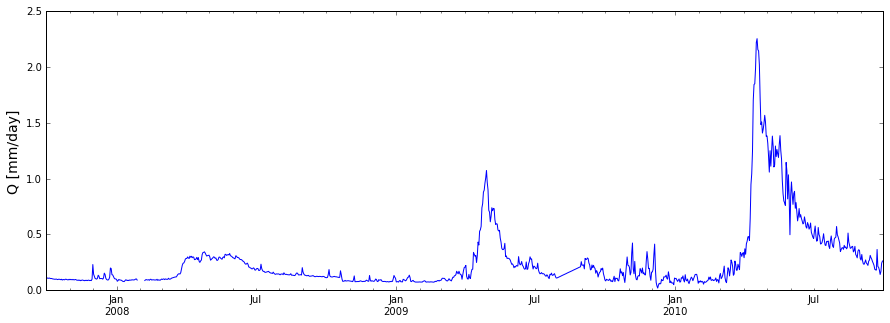

In [26]:
plt.figure(figsize=(15,5))
data.LowerLaJara.plot()
plt.ylabel('Q [mm/day]', fontsize = 14)

In [27]:
# convert CFS to CMS
data *= 0.028316847

In [28]:
# convert to daily volumes
data *= (60*60*24)

In [29]:
data.head()

,LowerLaJara,HistoryGrove,UpperJaramillo
2007-10-01,264.230163,313.161674,420.811000
2007-10-02,271.569889,327.841128,452.616482
2007-10-03,261.783587,305.821948,386.558942
2007-10-04,261.783587,310.715099,415.917849
2007-10-05,266.676738,310.715099,408.578122


In [30]:
data.to_pickle('./data/valles_streamflow.pcl')

In [31]:
# isolate lower la jara and convert to specific discharge
del data['HistoryGrove']
del data['UpperJaramillo']

ba = 3671857 # basin area in m2

data.LowerLaJara /= ba # discharg is now in m

In [32]:
# convert m to mm
data.LowerLaJara *= 1000.

In [33]:
data.columns = ['discharge']

In [34]:
data.to_pickle('./data/lower_lajara_specific_discharge.pcl')